In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
from pymatch.Matcher import Matcher
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the GATS 2009 PUF and Preprocess

In [2]:
gats_2009 = pd.read_stata('GATS 2009 Survey Data.dta')
gats_2009['2015'] = gats_2009.apply(lambda row: 0, axis=1)
gats_2009 = gats_2009.replace({'b06a': {'r smokes product but not every day': 2}})
gats_2009.b06a = pd.to_numeric(gats_2009.b06a, errors='coerce')
gats_2009 = gats_2009[gats_2009['f01d'] != 'refused']
gats_2009.head(10)

,caseid,gatsstrata,gatscluster,gatsweight,residence,age,selectee,hh1,hh2,hh3,...,h02a,h02b,h02c,h03,h02_1,h02_2,h02_3,h04,intlang,2015
0,10351.0,2.0,15052.0,1874.028579,rural,57.0,1.0,2.0,1.0,1.0,...,yes,yes,yes,yes,NaN,all equally harmful,yes,favor,ilocano,0
1,10352.0,2.0,15052.0,1712.914020,rural,53.0,1.0,3.0,3.0,1.0,...,NaN,NaN,NaN,no,NaN,NaN,yes,favor,ilocano,0
2,10353.0,2.0,15052.0,2328.719956,rural,85.0,1.0,3.0,3.0,2.0,...,yes,yes,yes,yes,NaN,all equally harmful,yes,favor,ilocano,0
3,10354.0,2.0,15052.0,1900.307122,rural,51.0,1.0,5.0,3.0,2.0,...,yes,yes,yes,yes,no different,all equally harmful,yes,favor,ilocano,0
4,10355.0,2.0,15052.0,3152.802849,rural,31.0,1.0,5.0,4.0,2.0,...,yes,yes,yes,yes,NaN,all equally harmful,yes,favor,ilocano,0
5,10356.0,2.0,15052.0,6047.829508,rural,21.0,3.0,9.0,9.0,4.0,...,yes,yes,yes,yes,no different,all equally harmful,no,favor,ilocano,0
6,10358.0,2.0,15052.0,5970.002164,rural,17.0,2.0,9.0,5.0,3.0,...,NaN,NaN,NaN,no,NaN,NaN,no,favor,ilocano,0
7,10359.0,2.0,15052.0,1583.938984,rural,23.0,1.0,4.0,3.0,1.0,...,yes,yes,yes,yes,NaN,all equally harmful,yes,favor,ilocano,0
8,10360.0,2.0,15052.0,1810.808536,rural,38.0,1.0,6.0,2.0,1.0,...,yes,don't know,yes,yes,NaN,all equally harmful,yes,favor,ilocano,0
9,10361.0,2.0,15052.0,1874.028579,rural,58.0,1.0,2.0,2.0,1.0,...,don't know,no,yes,don't know,NaN,donT KNOW,donT KNOW,favor,ilocano,0


In [3]:
gats_2009[['f01b', 'f01c', 'f01d']] = gats_2009[['f01b', 'f01c', 'f01d']].fillna(1)
gats_2009.f01d = pd.to_numeric(gats_2009.f01d, errors='coerce')
gats_2009.f02 = pd.to_numeric(gats_2009.f02, errors='coerce')
gats_2009['cigarette_price'] = gats_2009['f02'] / (gats_2009['f01b'] * gats_2009['f01c'] * gats_2009['f01d'])
gats_2009[['f01a','f01b', 'f01c', 'f01d', 'f02', 'cigarette_price']].head(50)

,f01a,f01b,f01c,f01d,f02,cigarette_price
0,NaN,1.0,1.0,1.0,NaN,NaN
1,packs,20.0,1.0,20.0,14.0,0.035000
2,NaN,1.0,1.0,1.0,NaN,NaN
3,packs,1.0,1.0,20.0,14.0,0.700000
4,NaN,1.0,1.0,1.0,NaN,NaN
5,cigarettes,2.0,1.0,1.0,4.0,2.000000
6,NaN,1.0,1.0,1.0,NaN,NaN
7,NaN,1.0,1.0,1.0,NaN,NaN
8,NaN,1.0,1.0,1.0,NaN,NaN
9,NaN,1.0,1.0,1.0,NaN,NaN


# Load the GATS 2015 PUF and Preprocess

In [4]:
gats_2015 = pd.read_stata('GATS 2015 Survey Data.dta')
gats_2015.columns = [x.lower() for x in list(gats_2015.columns)]
gats_2015 = gats_2015.applymap(lambda s:s.lower() if type(s) == str else s)
gats_2015['2015'] = gats_2015.apply(lambda row: 1, axis=1)
gats_2015.head(10)

,caseid,fiid,region,residence,intlang,gatsweight,gatsstrata,gatscluster,selectee,age,...,h03,h02_1,h02_2,h02_3,h04,cp03,cp04,cp02x1,cp02x2,2015
0,500010.0,133910.0,13.0,1.0,english,8578.100085,14120.0,414120.0,3.0,16.835616,...,yes,NaN,all equally harmful,yes,favor,NaN,NaN,NaN,NaN,1
1,500020.0,133910.0,13.0,1.0,tagalog,1984.944720,14120.0,414120.0,1.0,58.704110,...,yes,NaN,all equally harmful,yes,favor,NaN,NaN,NaN,NaN,1
2,500030.0,133910.0,13.0,1.0,english,3969.889441,14120.0,414120.0,2.0,60.789041,...,yes,NaN,all equally harmful,yes,favor,NaN,NaN,NaN,NaN,1
3,500040.0,133910.0,13.0,1.0,english,14434.830597,14120.0,414120.0,5.0,18.284932,...,don't know,NaN,all equally harmful,yes,favor,NaN,NaN,NaN,NaN,1
4,500050.0,133910.0,13.0,1.0,tagalog,6641.594441,14120.0,414120.0,2.0,48.424658,...,yes,NaN,all equally harmful,yes,favor,NaN,NaN,NaN,NaN,1
5,500060.0,133910.0,13.0,1.0,tagalog,8213.475555,14120.0,414120.0,2.0,38.172603,...,don't know,NaN,all equally harmful,yes,favor,NaN,NaN,NaN,NaN,1
6,500070.0,133910.0,13.0,1.0,tagalog,10271.864788,22200.0,414129.0,2.0,21.769863,...,don't know,NaN,all equally harmful,yes,favor,NaN,NaN,NaN,NaN,1
7,500080.0,133910.0,13.0,1.0,tagalog,4917.622172,22200.0,414129.0,2.0,38.693151,...,yes,NaN,all equally harmful,yes,favor,NaN,NaN,NaN,NaN,1
8,500090.0,133910.0,13.0,1.0,tagalog,5002.565286,22200.0,414129.0,2.0,32.106849,...,yes,NaN,all equally harmful,yes,favor,NaN,NaN,NaN,NaN,1
9,500100.0,133910.0,13.0,1.0,tagalog,8913.286558,22200.0,414129.0,2.0,55.021918,...,no,NaN,all equally harmful,yes,favor,NaN,NaN,NaN,NaN,1


In [6]:
gats_2015[['f01bcig', 'f01bpack', 'f01bcart', 'f01bother', 'f01dpack', 'f01dpacka','f01dcart', 'f01dcarta', 'f01dother']] = gats_2015[['f01bcig', 'f01bpack', 'f01bcart', 'f01bother', 'f01dpack', 'f01dpacka','f01dcart', 'f01dcarta', 'f01dother']].fillna(1)
gats_2015.f01dpack = pd.to_numeric(gats_2015.f01dpack, errors='coerce')
gats_2015.f01dcart = pd.to_numeric(gats_2015.f01dcart, errors='coerce')
gats_2015['cigarette_price'] = gats_2015['f02'] / (gats_2015['f01bcig'] * gats_2015['f01bpack'] * gats_2015['f01bcart'] * gats_2015['f01bother'] * gats_2015['f01dpack']*gats_2015['f01dpacka']*gats_2015['f01dcart']*gats_2015['f01dcarta']*gats_2015['f01dother'])
gats_2015[['f01a','f01bcig', 'f01bpack', 'f01bcart', 'f01bother', 'f01dpack', 'f01dpacka','f01dcart', 'f01dcarta', 'f01dother', 'f02', 'cigarette_price']].head(50)

,f01a,f01bcig,f01bpack,f01bcart,f01bother,f01dpack,f01dpacka,f01dcart,f01dcarta,f01dother,f02,cigarette_price
0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
5,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
6,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
7,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
8,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
9,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [243]:
pd.pivot_table(data=gats_2015, values=['b06a','age', 'hh1'], index='d07', aggfunc=np.nanmean)

,age,b06a,hh1
d07,,,
no,42.238658,19.686747,4.390000
yes,46.615149,20.829971,4.178824


In [7]:
panel_gats = pd.concat([gats_2009, gats_2015], axis=0)
#panel_gats

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
panel_gats = panel_gats.replace({'b06a': {888: 1}})
panel_gats['b06a']=panel_gats['b06a'].fillna(0)
panel_gats['b06a1'] = panel_gats['b06a1'].fillna(1)
panel_gats['b06a'] = panel_gats['b06a'] * panel_gats['b06a1']
panel_gats = panel_gats[panel_gats['b06a']<100]
#panel_gats['b06a'].describe()

In [9]:
panel_gats = panel_gats.replace({'b04': {99: 19, 'don\'t know/refused':19}})
#panel_gats['b04'].describe()

In [10]:
panel_gats['age'] = panel_gats['age'].apply(np.floor)
#panel_gats

In [11]:
panel_gats['num_children'] = panel_gats['hh1'] - panel_gats['hh2']
#panel_gats

In [12]:
panel_gats = panel_gats.replace({'residence': {1: 'urban', 2: 'rural'}})
panel_gats = panel_gats.replace({'hh4e': {1: 'yes', 2: 'no', 7: 'don\'t know', 9: 'refused'}})
panel_gats.b04 = pd.to_numeric(panel_gats.b04, errors='coerce')
panel_gats.f02 = pd.to_numeric(panel_gats.f02, errors='coerce')

# Cross Tabulation to Generate Balancing Tests

In [503]:
# Sample Size
pivot_size = pd.crosstab(panel_gats['g03'], [panel_gats['2015'], panel_gats['d07']])
pivot_size

2015         0        1     
d07         no  yes  no  yes
g03                         
don't know   2    2   2    2
no          55  155  50  138
refused      0    0   1    1
yes         35  181  39  250

In [64]:
from scipy import stats
def t_test(mean_a, mean_b, size_1, size_2, std_1, std_2):
    df = (size_1 + size_2) - 2
    var = (((size_1 - 1)*(std_1)**2) + ((size_2 - 1)*(std_2)**2)) / df
    t_stat = (mean_a - mean_b) / np.sqrt(var*((1/size_1)+(1/size_2)))
    p = stats.t.sf(np.abs(t_stat), df)*2
    return p

In [84]:
# per year
t_test(18.096537, 15.291710, 9953, 9953, 80.568001, 69.996645)

0.008752138601747802

In [98]:
crosstab = pd.crosstab(panel_gats['g03'], [panel_gats['2015'], panel_gats['a04']])
crosstab[0]

a04,college graduate,college undergraduate,elementary graduate,elementary undergraduate,high school graduate,high school undergraduate,no formal schooling,post graduate degree completed,"post secondary, includes in yrs 1, 2, or 3",refused
g03,,,,,,,,,,
don't know,3,2,15,11,6,8,0,0,4,0
no,99,145,208,312,280,218,36,6,31,1
refused,0,0,1,1,0,0,0,0,0,0
yes,54,129,170,209,239,221,18,4,23,0


# More Data Pre-Processing

In [13]:
def income_bracket(x):
    if x == '1 to 3,499':
        return 1
    else:
        return 0
def income_bracket_2(x):
    if x == '3,500 to 4,999':
        return 1
    else:
        return 0
def income_bracket_3(x):
    if x == '5,000 to 8,499':
        return 1
    else:
        return 0
def income_bracket_4(x):
    if x == '8,500 to 20,999' or x == '8,500 to 19,999' or x == '20,000 to 20,999':
        return 1
    else:
        return 0
def income_bracket_5(x):
    if x == '21,000 or higher' or x == '21,000 to 29,999' or x == '30,000 to 39,999' or x == '40,000 to 49,999' or x=='50,000 or higher':
        return 1
    else:
        return 0
def elementary_undergraduate(x):
    if x == 'elementary undergraduate':
        return 1
    else:
        return 0
def elementary_graduate(x):
    if x == 'elementary graduate':
        return 1
    else:
        return 0
def highschool_undergraduate(x):
    if x == 'high school undergraduate':
        return 1
    else:
        return 0
def highschool_graduate(x):
    if x == 'high school graduate':
        return 1
    else:
        return 0
def college_undergraduate(x):
    if x == 'college undergraduate' or x == 'post secondary' or x == 'post secondary, includes in yrs 1, 2, or 3':
        return 1
    else:
        return 0
def college_graduate(x):
    if x == 'college graduate' or x == 'post graduate completed':
        return 1
    else:
        return 0
def smoking_allowed(x):
    if x == 'allowed':
        return 1
    else:
        return 0
def smoking_no_rules(x):
    if x == 'no rules':
        return 1
    else:
        return 0
def smoke_level_2(x):
    if x == '6 to 30 minutes':
        return 1
    else:
        return 0
def smoke_level_3(x):
    if x == '31 to 60 minutes':
        return 1
    else:
        return 0
def smoke_level_4(x):
    if x == 'more than 60 minutes':
        return 1
    else:
        return 0
def quit_1(x):
    if x == 'quit within the next month':
        return 1
    else:
        return 0
def quit_2(x):
    if x == 'thinking within the next 12 months':
        return 1
    else:
        return 0
def quit_3(x):
    if x == 'quit someday, but not next 12 months' or x == 'quit someday':
        return 1
    else:
        return 0
def price_increase_2009(x):
    if x >= 1:
        return 1
    else:
        return 0

In [14]:
data_psm = panel_gats[['g02', '2015', 'b06a','age', 'residence','a01','hh1', 'num_children', 'aa6', 'aa06', 'b04', 'a04', 'd01', 'd04', 'e01', 'e04', 'e05', 'b07','a06d', 'a06e', 'a06f', 'd08','g01b', 'g01c', 'g01d3', 'h01', 'cigarette_price', 'gatsweight', 'b01', 'e17']].dropna(subset=['age', 'num_children'])
data_psm = data_psm[(data_psm['d01']== 'yes')| (data_psm['d01']== 'no')|(data_psm['d01']== 'refused')]
data_psm = data_psm.replace({'b01': {'daily':1, 'less than daily': 1, 'not at all':0}})
data_psm = data_psm.replace({'e17': {'yes': 1, 'no': 0, 'don\'t know':0, 'refused':0}})
data_psm.b01 = pd.to_numeric(data_psm.b01, errors='coerce')
data_psm.e17 = pd.to_numeric(data_psm.e17, errors='coerce')
data_psm = data_psm.replace({'g02': {'yes': 1, 'no': 0, 'didn\'t see any cig packages':0, 'refused':0}})
data_psm['1 to 3499_2009'] = data_psm['aa6'].apply(income_bracket)
data_psm['1 to 3499_2015'] = data_psm['aa06'].apply(income_bracket)
data_psm['1 to 3499'] = data_psm['1 to 3499_2009'] + data_psm['1 to 3499_2015']
data_psm = data_psm.drop(['1 to 3499_2009', '1 to 3499_2015'], axis=1)
data_psm['3500 to 4999_2009'] = data_psm['aa6'].apply(income_bracket_2)
data_psm['3500 to 4999_2015'] = data_psm['aa06'].apply(income_bracket_2)
data_psm['3500 to 4999'] = data_psm['3500 to 4999_2009'] + data_psm['3500 to 4999_2015']
data_psm = data_psm.drop(['3500 to 4999_2009', '3500 to 4999_2015'], axis=1)
#data_psm

In [ ]:
data_psm

In [14]:
#data_psm = data_psm.replace({'ff7a': {'yes': 1, 'no': 0, 'refused': 0, 'don\'t know':0, np.NaN:0}})
#data_psm = data_psm.replace({'ff7b': {'yes': 1, 'no': 0, 'don\'t know':0, np.NaN:0}})
#data_psm = data_psm.replace({'ff7c': {'yes': 1, 'no': 0, 'don\'t know':0, np.NaN:0}})
#data_psm['smoke_tax_2009'] = data_psm['ff7a'] + data_psm['ff7b'] + data_psm['ff7c']
#data_psm['smoke_tax_2009'] = data_psm['smoke_tax_2009'].apply(price_increase_2009)
#data_psm = data_psm.drop(['ff7a', 'ff7b', 'ff7c'], axis=1)
#data_psm

In [12]:
#data_psm = data_psm.replace({'ff2': {'yes': 1, 'no': 0, 'refused': 0, 'don\'t know':0, np.NaN:0}})
#data_psm['reduce_smoking_by_tax'] = data_psm['smoke_tax_2009'] + data_psm['ff2']
#data_psm = data_psm.drop(['smoke_tax_2009', 'ff2'], axis=1)
#data_psm

In [15]:
data_psm = data_psm.replace({'h01': {'yes': 1, 'no': 0, 'refused':0, 'don\'t know':0, np.NaN:0}})
data_psm.h01 = pd.to_numeric(data_psm.h01, errors='coerce')
data_psm = data_psm.replace({'d01': {'yes': 1, 'no': 0, 'refused':0}})
data_psm = data_psm.replace({'d04': {'yes': 1, 'no': 0, 'refused':0, np.NaN:0}})
data_psm.d04 = pd.to_numeric(data_psm.d04, errors='coerce')
data_psm = data_psm.replace({'e04': {'yes': 1, 'no/don\'t work': 0, 'refused':0}})
#data_psm

In [16]:
data_psm['quit_by_next_month'] = data_psm['d08'].apply(quit_1)
data_psm['quit_by_next_year'] = data_psm['d08'].apply(quit_2)
data_psm['quit_someday'] = data_psm['d08'].apply(quit_3)
data_psm = data_psm.replace({'g01b': {'yes': 1, 'no': 0, 'refused':0, 'not applicable':0}})
data_psm = data_psm.replace({'g01c': {'yes': 1, 'no': 0, 'refused':0, 'not applicable':0}})
data_psm = data_psm.replace({'g01d3': {'yes': 1, 'no': 0, 'refused':0, 'not applicable':0}})
data_psm = data_psm.drop('d08', axis=1)
#data_psm

In [17]:
data_psm['6_to_30_minutes'] = data_psm['b07'].apply(smoke_level_2)
data_psm['31_to_60_minutes'] = data_psm['b07'].apply(smoke_level_3)
data_psm['beyond_60_minutes'] = data_psm['b07'].apply(smoke_level_4)
data_psm = data_psm.drop('b07', axis=1)
#data_psm

In [18]:
data_psm = data_psm.replace({'a06f': {'yes': 1, 'no': 0, 'don\'t know':0, 'refused':0}})
data_psm = data_psm.replace({'a06d': {'yes': 1, 'no': 0, 'refused':0, 'don\'t know':0}})
data_psm = data_psm.replace({'a06e': {'yes': 1, 'no': 0, 'refused':0, 'don\'t know':0}})

In [19]:
data_psm['e01'] = data_psm['e01'].astype(str) 
data_psm['home_smoking_allowed'] = data_psm['e01'].apply(smoking_allowed)
data_psm['home_smoking_no_rules'] = data_psm['e01'].apply(smoking_no_rules)
data_psm = data_psm.drop('e01', axis=1)

In [20]:
data_psm = data_psm.replace({'e05': {'indoors': 1, 'both': 1, 3: 1, 2: 0, 9: 0, 'outdoors':0, np.NaN:0}})
#data_psm

In [21]:
data_psm = data_psm.replace({'a01': {'female':1, 'male':0}})
data_psm['5000 to 8499_2009'] = data_psm['aa6'].apply(income_bracket_3)
data_psm['5000 to 8499_2015'] = data_psm['aa06'].apply(income_bracket_3)
data_psm['5000 to 8499'] = data_psm['5000 to 8499_2009'] + data_psm['5000 to 8499_2015']
data_psm = data_psm.drop(['5000 to 8499_2009', '5000 to 8499_2015'], axis=1)
#data_psm

In [22]:
data_psm['8500 to 20999_2009'] = data_psm['aa6'].apply(income_bracket_4)
data_psm['8500 to 20999_2015'] = data_psm['aa06'].apply(income_bracket_4)
data_psm['8500 to 20999'] = data_psm['8500 to 20999_2009'] + data_psm['8500 to 20999_2015']
data_psm = data_psm.drop(['8500 to 20999_2009', '8500 to 20999_2015'], axis=1)
#data_psm

In [23]:
data_psm['21000 and above_2009'] = data_psm['aa6'].apply(income_bracket_5)
data_psm['21000 and above_2015'] = data_psm['aa06'].apply(income_bracket_5)
data_psm['21000 and above'] = data_psm['21000 and above_2009'] + data_psm['21000 and above_2015']
data_psm = data_psm.drop(['21000 and above_2009', '21000 and above_2015'], axis=1)
#data_psm

In [24]:
data_psm = data_psm.replace({'residence': {'rural':0, 'urban':1}})
data_psm = data_psm.drop(['aa6', 'aa06'], axis=1)
data_psm['elementary_undergraduate'] = data_psm['a04'].apply(elementary_undergraduate)
data_psm['elementary_graduate'] = data_psm['a04'].apply(elementary_graduate)
data_psm['highschool_undergraduate'] = data_psm['a04'].apply(highschool_undergraduate)
data_psm['highschool_graduate'] = data_psm['a04'].apply(highschool_graduate)
data_psm['college_undergraduate'] = data_psm['a04'].apply(college_undergraduate)
data_psm['college_graduate'] = data_psm['a04'].apply(college_graduate)
#data_psm

In [25]:
data_psm = data_psm.drop(['a04'], axis=1)
#data_psm['b04'].fillna(19)
data_psm = data_psm.rename(columns={"g02": "seen_health_warnings", "b06a": "daily_cigarette_intake", "residence":"urban", "a01":"female", "hh1": "household_size", "d01":"tried_stop_smoking", "d04":"visited_hospital", "e04": "employed", "e05": "works_indoors", "a06d": "cellphone", "a06e": "television", "a06f": "radio", "g01b": "health_warning_on_TV", "g01c": "health_warning_on_radio", "g01d3": "health_warning_on_hospital", "h01": "know_smoking_risks", "b01":"daily_smoker", "e17":"know_secondhand_smoke"})
data_psm['health_warnings_interaction'] = data_psm['seen_health_warnings'] * data_psm['2015']
#data_psm['quit_next_month_interaction'] = data_psm['quit_by_next_month'] * data_psm['health_warnings_interaction'] 
#data_psm['quit_next_year_interaction'] = data_psm['quit_by_next_year'] * data_psm['health_warnings_interaction']
#data_psm['quit_someday_interaction'] = data_psm['quit_someday'] * data_psm['health_warnings_interaction']
#data_psm

In [26]:
data_psm['cigarette_price'].fillna(3.82, inplace=True)
data_psm['b04'].fillna(19, inplace=True)
data_psm = data_psm.rename(columns={'b04': 'age_started_smoking'})
#data_psm['age_started_smoking'].unique()

# Propensity Score Matching Implementation

In [27]:
from pymatch.Matcher import Matcher

test_data = data_psm[data_psm['health_warnings_interaction'] == 1] 
control_data = data_psm[data_psm['health_warnings_interaction'] == 0]
m = Matcher(test_data, control_data, yvar="health_warnings_interaction", exclude=['reduce_smoking_by_tax', 'smoking_tax_interaction', 'health_warnings_interaction','2015', 'seen_health_warnings','age_started_smoking', 
                                                                           '1 to 3499 interaction', '3500 to 4999 interaction', '5000 to 8499 interaction', '8500 to 20999 interaction', 'visited_hospital',
                                                                           '21000 and above interaction', 'health_warning_on_TV', 'health_warning_on_radio', 'cigarette_price', 'daily_smoker', 'tried_stop_smoking',
                                                                           'health_warning_on_hospital', 'daily_cigarette_intake', 'gatsweight', 'quit_by_next_month','quit_by_next_year','quit_someday',
                                                                           '6_to_30_minutes','31_to_60_minutes','beyond_60_minutes','home_smoking_allowed', 'home_smoking_no_rules', 'works_indoors'])

Formula:
health_warnings_interaction ~ 1 to 3499+21000 and above+3500 to 4999+5000 to 8499+8500 to 20999+age+cellphone+college_graduate+college_undergraduate+elementary_graduate+elementary_undergraduate+employed+female+highschool_graduate+highschool_undergraduate+household_size+know_secondhand_smoke+know_smoking_risks+num_children+radio+television+urban
n majority: 3017
n minority: 2534


In [28]:
np.random.seed(20170925)
m.fit_scores(balance=True, nmodels=10)

Static column dropped: daily_smokerwarnings
Average Accuracy: 63.26%


In [1025]:
test_data['television'].unique()

array([0, 1, "don't know"], dtype=object)

In [29]:
m.predict_scores()

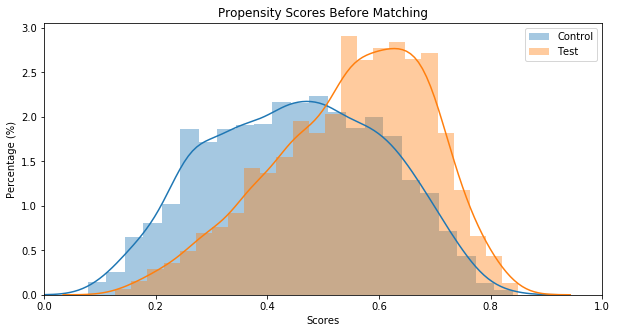

In [30]:
m.plot_scores()

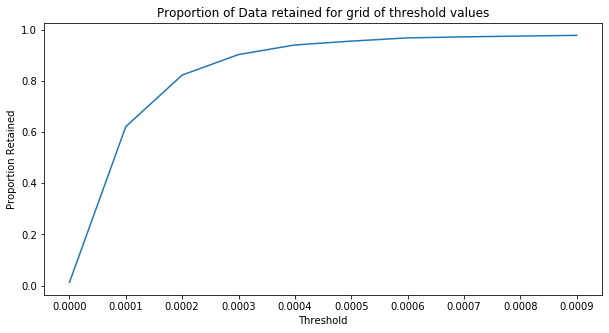

In [1178]:
m.tune_threshold(method='random')

In [31]:
m.match(method="min", nmatches=1, threshold=0.0009)
m.record_frequency()

,freq,n_records
0,1,3305
1,2,358
2,3,157
3,4,54
4,5,20
5,6,13
6,7,7
7,8,9
8,9,4
9,12,1


In [44]:
m.assign_weight_vector()

In [104]:
psm_matched = m.matched_data.sort_values("match_id")[['health_warnings_interaction', 'scores', 'match_id', 'daily_cigarette_intake']]
psm_matched[psm_matched['health_warnings_interaction']==1].describe()

,health_warnings_interaction,scores,match_id,daily_cigarette_intake
count,953.0,953.000000,953.000000,953.000000
mean,1.0,0.332088,476.000000,15.291710
std,0.0,0.147989,275.251703,69.996645
min,1.0,0.030901,0.000000,0.000000
25%,1.0,0.226145,238.000000,4.000000
50%,1.0,0.327314,476.000000,10.000000
75%,1.0,0.439083,714.000000,13.000000
max,1.0,0.744954,952.000000,888.000000


In [32]:
psm_matched = m.matched_data
psm_matched.sort_values("match_id")[['health_warnings_interaction', 'match_id']]

,health_warnings_interaction,match_id
0,1,0
4765,0,0
1,1,1
4332,0,1
2,1,2
5500,0,2
3,1,3
5427,0,3
4,1,4
3614,0,4


# Logit Model on Original Dataset

A dummy variable that codes whether a smoker tried to stop smoking is regressed to a set of covariates.

In [156]:
tried_quitting_logit = sm.Logit(data_psm['tried_stop_smoking'], data_psm.drop(['daily_smoker', 'daily_cigarette_intake','works_indoors', 'cellphone', 'television', 'radio', 'tried_stop_smoking',
                                                                'home_smoking_allowed', 'home_smoking_no_rules', '6_to_30_minutes', '31_to_60_minutes', 'beyond_60_minutes', 'gatsweight', 'age_started_smoking',
                                                                'quit_by_next_month', 'quit_by_next_year', 'quit_someday', 'health_warning_on_TV', 'health_warning_on_radio', 'health_warning_on_hospital', 'cigarette_price'], axis = 1)).fit(cov_type='HC3')
tried_quitting_logit.summary()

Optimization terminated successfully.
         Current function value: 0.665935
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     tried_stop_smoking   No. Observations:                 5551
Model:                          Logit   Df Residuals:                     5528
Method:                           MLE   Df Model:                           22
Date:                Wed, 10 Jun 2020   Pseudo R-squ.:                 0.03833
Time:                        16:08:19   Log-Likelihood:                -3696.6
converged:                       True   LL-Null:                       -3843.9
Covariance Type:                  HC3   LLR p-value:                 1.458e-49
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
seen_health_warnings           -0.2825      0.119     -2.370      0.018      -0.516      -0.049
2015                           -0.2460      0.163     -1.512      0.131      -0.565       0.073
age                            -0.0101      0.002     -5.601      0.000      -0.014      -0.007
urban                          -0.1715      0.061     -2.820      0.005      -0.291      -0.052
female                          0.1104      0.085      1.294      0.196      -0.057       0.278
household_size                 -0.0389      0.018     -2.127      0.033      -0.075      -0.003
num_children                    0.0281      0.026      1.084      0.279      -0.023       0.079
visited_hospital                0.8009      0.066     12.193      0.000       0.672       0.930
employed                       -0.3670      0.093     -3.957      0.000      -0.549      -0.185
know_smoking_risks              0.1180      0.098      1.199      0.231      -0.075       0.311
know_secondhand_smoke           0.5449      0.090      6.031      0.000       0.368       0.722
1 to 3499                       0.2642      0.110      2.395      0.017       0.048       0.480
3500 to 4999                    0.1755      0.124      1.419      0.156      -0.067       0.418
5000 to 8499                    0.0736      0.124      0.596      0.551      -0.169       0.316
8500 to 20999                   0.1379      0.137      1.006      0.315      -0.131       0.407
21000 and above                 0.8279      0.307      2.700      0.007       0.227       1.429
elementary_undergraduate       -0.1281      0.131     -0.977      0.329      -0.385       0.129
elementary_graduate             0.0865      0.141      0.614      0.539      -0.190       0.363
highschool_undergraduate        0.2245      0.140      1.600      0.110      -0.050       0.499
highschool_graduate             0.1877      0.138      1.357      0.175      -0.083       0.459
college_undergraduate           0.0725      0.150      0.485      0.628      -0.221       0.366
college_graduate                0.0763      0.173      0.442      0.659      -0.262       0.415
health_warnings_interaction     0.3600      0.173      2.086      0.037       0.022       0.698
===============================================================================================
"""

# Logit Model on Dataset with PSM

The health warnings interaction variable, although same in the initial case, has led to statistically insignificant results. This is contributed by a reduction in the sample size.

In [159]:
tried_stop_smoking_psm = sm.Logit(psm_matched['tried_stop_smoking'], psm_matched.drop(['daily_smoker','daily_cigarette_intake', 'works_indoors', 'cellphone', 'television', 'radio', 'tried_stop_smoking',
                                                                'home_smoking_allowed', 'home_smoking_no_rules', '6_to_30_minutes', '31_to_60_minutes', 'beyond_60_minutes', 'gatsweight', 'cigarette_price', 'age_started_smoking',
                                                                'quit_by_next_month', 'quit_by_next_year', 'quit_someday', 'scores', 'match_id','visited_hospital',
                                                                'health_warning_on_TV', 'health_warning_on_hospital', 'health_warning_on_radio', 'record_id'], axis = 1)).fit(cov_type='HC3')
tried_stop_smoking_psm.summary()

Optimization terminated successfully.
         Current function value: 0.682612
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     tried_stop_smoking   No. Observations:                 5068
Model:                          Logit   Df Residuals:                     5046
Method:                           MLE   Df Model:                           21
Date:                Wed, 10 Jun 2020   Pseudo R-squ.:                 0.01519
Time:                        16:25:38   Log-Likelihood:                -3459.5
converged:                       True   LL-Null:                       -3512.9
Covariance Type:                  HC3   LLR p-value:                 1.814e-13
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
1 to 3499                       0.2066      0.117      1.763      0.078      -0.023       0.436
2015                           -0.1582      0.185     -0.856      0.392      -0.521       0.204
21000 and above                 1.1203      0.359      3.117      0.002       0.416       1.825
3500 to 4999                    0.0912      0.128      0.711      0.477      -0.160       0.343
5000 to 8499                    0.0809      0.127      0.640      0.522      -0.167       0.329
8500 to 20999                   0.0144      0.135      0.107      0.915      -0.250       0.279
age                            -0.0067      0.002     -3.417      0.001      -0.011      -0.003
college_graduate                0.1169      0.182      0.643      0.520      -0.240       0.473
college_undergraduate           0.1223      0.169      0.724      0.469      -0.209       0.453
elementary_graduate             0.0159      0.162      0.098      0.922      -0.301       0.333
elementary_undergraduate       -0.1566      0.157     -0.998      0.318      -0.464       0.151
employed                       -0.1956      0.096     -2.046      0.041      -0.383      -0.008
female                          0.1690      0.097      1.745      0.081      -0.021       0.359
health_warnings_interaction     0.1765      0.194      0.909      0.363      -0.204       0.557
highschool_graduate             0.2376      0.156      1.521      0.128      -0.069       0.544
highschool_undergraduate        0.1173      0.160      0.735      0.462      -0.195       0.430
household_size                 -0.0314      0.020     -1.564      0.118      -0.071       0.008
know_secondhand_smoke           0.5611      0.101      5.548      0.000       0.363       0.759
know_smoking_risks              0.0856      0.114      0.750      0.453      -0.138       0.309
num_children                    0.0263      0.028      0.957      0.339      -0.028       0.080
seen_health_warnings           -0.2002      0.148     -1.350      0.177      -0.491       0.090
urban                          -0.1947      0.062     -3.132      0.002      -0.317      -0.073
===============================================================================================
"""

# Basic DD Model without Covariates

Applied to the dataset that drops observations with no matches after applying the propensity score matching algorithm.

In [121]:
dd_basic = sm.OLS(psm_matched['daily_cigarette_intake'], sm.add_constant(psm_matched[['2015', 'seen_health_warnings', 'health_warnings_interaction']])).fit(cov_type='HC3')
dd_basic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     daily_cigarette_intake   R-squared:                       0.005
Model:                                OLS   Adj. R-squared:                  0.005
Method:                     Least Squares   F-statistic:                     9.630
Date:                    Wed, 10 Jun 2020   Prob (F-statistic):           2.45e-06
Time:                            15:28:33   Log-Likelihood:                -18121.
No. Observations:                    5068   AIC:                         3.625e+04
Df Residuals:                        5064   BIC:                         3.628e+04
Df Model:                               3                                         
Covariance Type:                      HC3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           5.7417      0.713      8.054      0.000       4.344       7.139
2015                            1.2665      0.874      1.449      0.147      -0.446       2.979
seen_health_warnings            3.1489      0.737      4.272      0.000       1.704       4.594
health_warnings_interaction    -1.4366      0.910     -1.578      0.115      -3.221       0.347
==============================================================================
Omnibus:                     1695.321   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7250.068
Skew:                           1.589   Prob(JB):                         0.00
Kurtosis:                       7.923   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

# DD Model with Covariates

A weighted least squares regression is used in order to take into account the sampling weights of each observation in the dataset. All standard errors are heteroskedasticity robust.

The Durbin-Watson statistic is close to 2, implying that there is no first order serial correlation in the regression equation.

The Jarque-Bera test for the normality of residuals has resulted to a p-value less than 0.05, implying that the error terms are not normal. This is corrected by increasing the sample size of smokers.

In [162]:
dd_GHW_PSM_DD_weighted = sm.WLS(psm_matched['daily_cigarette_intake'], sm.add_constant(psm_matched.drop(['daily_cigarette_intake', 'cellphone', 'television', 'radio', 'tried_stop_smoking', 'gatsweight', 'daily_smoker',
                                                                                                'age_started_smoking', 'works_indoors', 'health_warning_on_TV', 'health_warning_on_radio', 'health_warning_on_hospital','home_smoking_allowed',
                                                                                                'works_indoors', 'cigarette_price', 'know_secondhand_smoke',
                                                                'home_smoking_no_rules', '6_to_30_minutes', '31_to_60_minutes', 'beyond_60_minutes', 'gatsweight', 'age_started_smoking',
                                                                'quit_by_next_month', 'quit_by_next_year', 'quit_someday', 'record_id', 'scores', 'match_id'], axis=1)), weights=psm_matched['gatsweight']).fit(cov_type='HC3', use_t=True)
dd_GHW_PSM_DD_weighted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              WLS Regression Results                              
==================================================================================
Dep. Variable:     daily_cigarette_intake   R-squared:                       0.047
Model:                                WLS   Adj. R-squared:                  0.042
Method:                     Least Squares   F-statistic:                     8.942
Date:                    Wed, 10 Jun 2020   Prob (F-statistic):           2.25e-29
Time:                            16:26:40   Log-Likelihood:                -18413.
No. Observations:                    5068   AIC:                         3.687e+04
Df Residuals:                        5045   BIC:                         3.702e+04
Df Model:                              22                                         
Covariance Type:                      HC3                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2406      1.598      0.151      0.880      -2.892       3.373
1 to 3499                       0.5832      0.578      1.009      0.313      -0.550       1.717
2015                            1.7363      1.140      1.523      0.128      -0.498       3.971
21000 and above                 0.5235      1.905      0.275      0.784      -3.212       4.259
3500 to 4999                    1.3002      0.658      1.977      0.048       0.011       2.590
5000 to 8499                    1.8515      0.644      2.876      0.004       0.590       3.113
8500 to 20999                   1.2562      0.687      1.829      0.067      -0.090       2.602
age                             0.0782      0.010      7.451      0.000       0.058       0.099
college_graduate                1.5287      1.191      1.284      0.199      -0.806       3.863
college_undergraduate           1.0295      1.102      0.935      0.350      -1.130       3.189
elementary_graduate             0.8727      1.033      0.844      0.398      -1.153       2.899
elementary_undergraduate        0.4693      1.040      0.451      0.652      -1.569       2.508
employed                        0.7334      0.472      1.555      0.120      -0.191       1.658
female                         -3.4050      0.425     -8.006      0.000      -4.239      -2.571
health_warnings_interaction    -1.7882      1.174     -1.523      0.128      -4.090       0.513
highschool_graduate             1.0749      1.032      1.042      0.298      -0.948       3.098
highschool_undergraduate        0.9976      1.034      0.965      0.335      -1.030       3.025
household_size                 -0.0212      0.095     -0.223      0.824      -0.208       0.165
know_smoking_risks              0.3968      0.556      0.713      0.476      -0.694       1.488
num_children                   -0.0519      0.133     -0.390      0.696      -0.313       0.209
seen_health_warnings            3.0271      1.000      3.026      0.002       1.066       4.988
urban                           0.4277      0.315      1.356      0.175      -0.191       1.046
visited_hospital               -0.2499      0.337     -0.741      0.459      -0.911       0.411
==============================================================================
Omnibus:                     1906.876   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11043.209
Skew:                           1.694   Prob(JB):                         0.00
Kurtosis:                       9.389   Cond. No.                         769.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
""

# White's Heteroskedasticity Test 

The F-test p-value that is less than 0.05 implies that there is heteroskedasticity in the dataset.

In [135]:
white_test = het_white(dd_GHW_PSM_DD_weighted.resid,  dd_GHW_PSM_DD_weighted.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 318.6058685431035, 'LM-Test p-value': 0.0016381996676737435, 'F-Statistic': 1.3035293232830136, 'F-Test p-value': 0.001247413913553963}


# Test for Multicollinearity Using Variance Inflation Factors

The model has variables which has a high degree of multicollinearity. The 2015 time variable and the interaction term has variance inflation factors greater than 10, which implies that these two variables are correlated with each other. This is expected in the difference-in-difference regression. This contributed to the high condition number of 769 as reported in the regression output. However, there is no multicollinearity in the set of covariates as all VIFs are less than 10.

In [157]:
variables = dd_GHW_PSM_DD_weighted.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif_dd_model = pd.DataFrame(dict(zip(dd_GHW_PSM_DD_weighted.model.exog_names, vif)).items(), columns=['regressor', 'VIF'])
vif_dd_model[1:]

,regressor,VIF
1,1 to 3499,3.818581
2,2015,13.745311
3,21000 and above,1.155430
4,3500 to 4999,2.863343
5,5000 to 8499,3.197042
6,8500 to 20999,2.610891
7,age,1.206248
8,college_graduate,4.134070
9,college_undergraduate,5.146326
10,elementary_graduate,6.370299


# Parallel-Trend Assumption

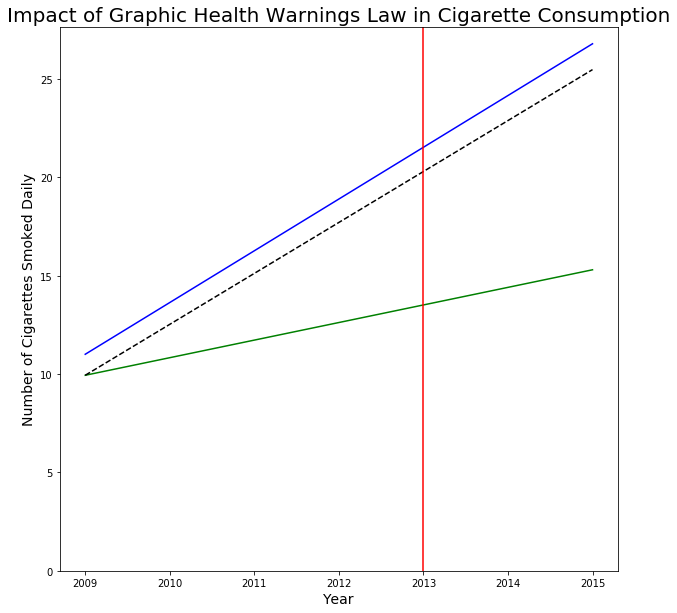

In [152]:
plt.figure(figsize=(10,10))
point1_control = [2009, 11]
point2_control = [2015, 26.772727]
point1_treat = [2009, 9.932763]
point2_treat = [2015, 15.291710]
x_values_control = [point1_control[0], point2_control[0]]
y_values_control = [point1_control[1], point2_control[1]]
x_values_treat = [2009, 2015]
y_values_treat = [9.932763, 15.291710]
x_values_constant = [2009, 2015]
y_values_constant = [9.932763, 25.459981]
plt.plot(x_values_control, y_values_control, color='blue')
plt.plot(x_values_treat, y_values_treat, color='green')
plt.plot(x_values_constant, y_values_constant, linestyle='--', color='black')
plt.axvline(x=2013, color='red')
plt.xlabel('Year', {'fontsize':14})
plt.ylabel('Number of Cigarettes Smoked Daily', {'fontsize':14})
plt.title('Impact of Graphic Health Warnings Law in Cigarette Consumption', {'fontsize':20})
plt.ylim(ymin=0)
plt.show()